In [1]:
%load_ext wurlitzer

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import boost_histogram as bh

from MomCorr import MomentumCorrections
from physics_vectors import LorentzVector, calc_W, calc_q2
from h10 import h10_data
from tqdm import tqdm

corr = MomentumCorrections()
# Ditry hack to get the mass of a particle saved in constants.h
mass_e = corr.CorrectVector(0,0,0,11).mass
mass_p = corr.CorrectVector(0,0,0,2212).mass

data_file_path = "/Users/tylern/Data/e1d/skim"

def getHist(hist, **kwargs):
    y, x = bh.numpy.histogram(hist, **kwargs)
    # Get bin centers for each point
    x = (x[1:] + x[:-1]) / 2.0
    
    return y, x

===== Using Momentum Corrections =====


In [3]:
root_reader = h10_data()
root_reader.add(f"{data_file_path}/*.root")
total = root_reader.num_entries+1

In [5]:
px_diff = np.empty(total)
py_diff = np.empty(total)
pz_diff = np.empty(total)

W = np.empty((total, 7))
W_corr = np.empty((total, 7))
Q2 = np.empty(total)

with tqdm(total=total) as pbar:
    for event in root_reader:
        if event.entry % 10000 == 0:
            pbar.update(10000)
        vec = LorentzVector(event.px[0],event.py[0], event.pz[0], pid=11)
        corrvec = corr.CorrectVector(event.px[0],event.py[0], event.pz[0], 11)
        sec = event.dc_sect[0] if (event.dc_sect[0] > 0 and event.dc_sect[0] < 7) else 0
        
        diff = (vec-corrvec)
        px_diff[event.entry] = diff.px
        py_diff[event.entry] = diff.py
        pz_diff[event.entry] = diff.pz
        
        W[event.entry, sec] = calc_W(vec)
        W_corr[event.entry, sec] = calc_W(corrvec)


93760000it [1:01:16, 25503.75it/s]                              


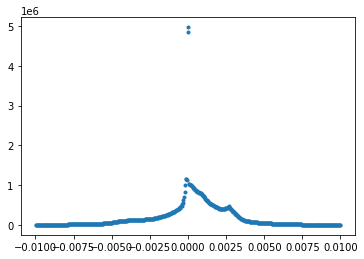

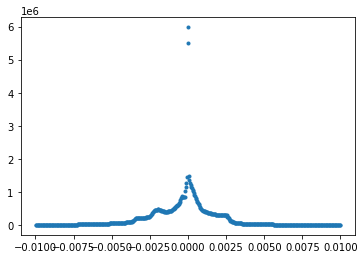

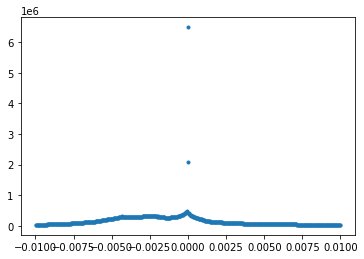

In [12]:
for p_diff in [px_diff, py_diff, pz_diff]:
    y, x = getHist(p_diff, bins=500, range=[-0.01, 0.01])
    plt.errorbar(x, y, fmt='.')
    plt.show()

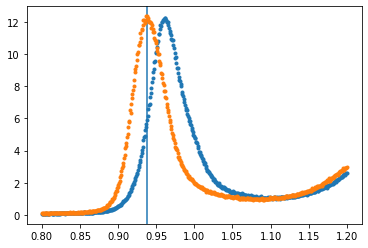

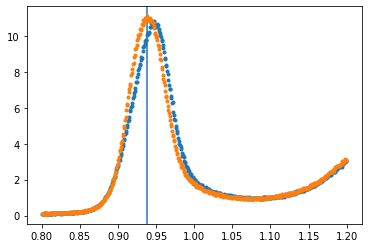

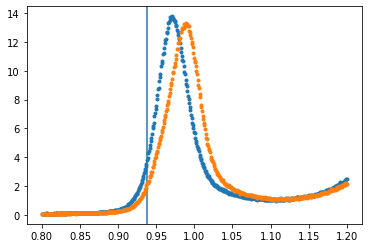

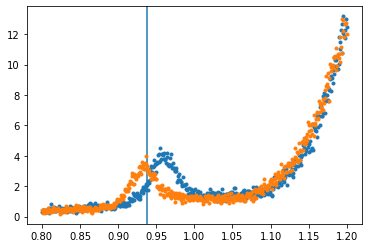

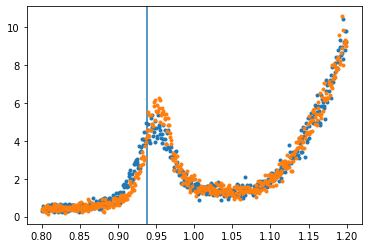

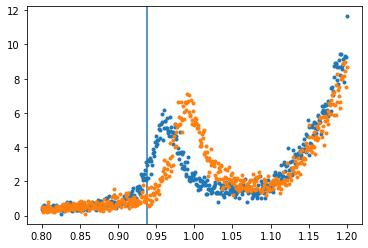

In [19]:
for i in range(1,7):
    y, x = getHist(W[:,i], range=[0.8,1.2], bins=500, density=True)
    plt.errorbar(x, y, fmt='.')
    y, x = getHist(W_corr[:,i], range=[0.8,1.2], bins=500, density=True)
    plt.errorbar(x, y, fmt='.')
    plt.axvline(mass_p)

    plt.show()

In [ ]:
print(f'{len(W):,}')